## Exercise in Photogrammetry I
## **Ex.2 : Computer Vision**
### Hand out: xx.xx.xxxx
### Submission: xx.xx.xxxx
### Points: 22

## A Numpy
### A1 Initialization
Numpy is the most used module for numerical applications in python.
**Tasks:**
1. import numpy (0.5 Points)
2. create and print a ... (2.5 Points)
   - ... 3x4 matrix with zeros
   - ... 4x3x3 matrix with ones
   - ... 3x3 identity matrix
   - ... 4x6 matrix with uniformly distributed values in the range of [0,1]. **Hint:** For reproducable results we can set a seed value by the function *np.random.seed(value)*
   - ... array with the values from 0 to 4 (integer)

In [1]:
# Import numpy here as np
import numpy as np

In [8]:
# Zero matrix
matrix_zeros = np.zeros((3, 4))
matrix_zeros

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [10]:
# Ones: 3 dimensional matrix
matrix_ones = np.ones((4, 3, 3))
matrix_ones

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [15]:
# Identity Matrix
matrix_identity = np.eye(3)
matrix_identity

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [24]:
# uniformly distributed matrix
np.random.seed(666)
matrix_uniform = np.random.rand(4, 6)
matrix_uniform

array([[0.70043712, 0.84418664, 0.67651434, 0.72785806, 0.95145796,
        0.0127032 ],
       [0.4135877 , 0.04881279, 0.09992856, 0.50806631, 0.20024754,
        0.74415417],
       [0.192892  , 0.70084475, 0.29322811, 0.77447945, 0.00510884,
        0.11285765],
       [0.11095367, 0.24766823, 0.0232363 , 0.72732115, 0.34003494,
        0.19750316]])

In [28]:
# arange
array_aranged = np.arange(5, dtype=int)
array_aranged

array([0, 1, 2, 3, 4])

## Images: Cube Slicing
In this course we will deal a lot with images, so that the handling of these should feel quite familiar to you.
An image in python is typically represented as a 3 dimensional numpy array *(rows, cols, channel)*. We will use matplotlib for the visualization and skimage for reading and writing to disk. 

**Task:** Import *pyplot* from *matplotlib* as well as *skimage.io*. (1 Point)

In [79]:
# Import pyplot and skimage.io, enable inline matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io

**Tasks:**
1. Load and visualize the image: *images/cube.jpg* (1 Point)
2. print the shape of the image as well as the underlying data type. (1 Point)
3. create two variables which hold the left and the right half of the image, respectively. Make sure that both parts have the same size and plot both images. **Hint:** use subplots (see example below) (3 Points)
4. flip the right image vertically. (1 Point)
5. Convert the left and the right flipped image to uint8 for later computations.  (1 Points)
6. Compute the absolute difference between the left and the right flipped image. (1 Point)
7. Convert the difference image back to uint8 and visualize it. (1 Point)

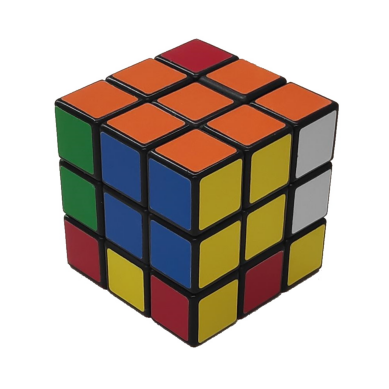

In [84]:
# Load and visualize image
image = io.imread('images/cube.jpg')
plt.imshow(image)
plt.axis('off')

plt.show()

In [85]:
# print the shape and underlying data type
print(f'{image.shape}')
print(f'{image.dtype}')

(950, 950, 3)
uint8


In [65]:
# Split image in left and right half:
columns_slice_left = slice(0, image.shape[1] // 2)
columns_slice_right = slice(image.shape[1] // 2, image.shape[1])
left_half = image[:, columns_slice_left, :]
right_half = image[:, columns_slice_right, :]

# print shapes:
print(f'{left_half.shape}')
print(f'{right_half.shape}')

(950, 475, 3)
(950, 475, 3)


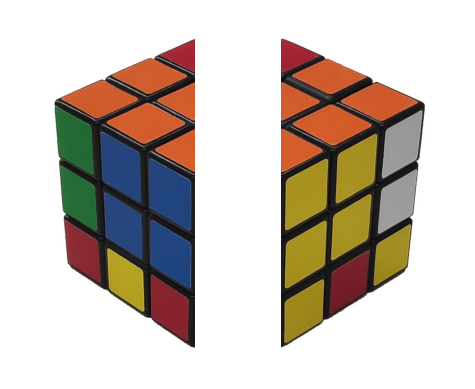

In [66]:
# Visualize left and right part

fig, axes = plt.subplots(ncols=2)

axes[0].imshow(left_half)
axes[1].imshow(right_half)

axes[0].set_axis_off()
axes[1].set_axis_off()

plt.show()

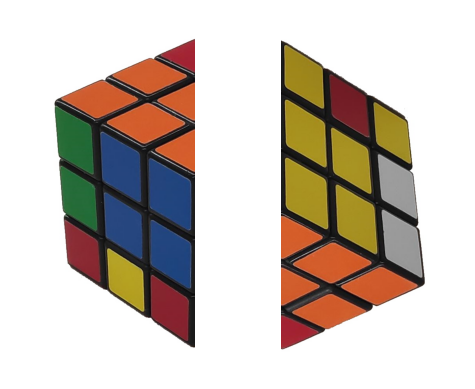

In [67]:
# flip right image and plot the result:
right_half_flipped = np.flipud(right_half)

fig, axes = plt.subplots(ncols=2)

axes[0].imshow(left_half)
axes[1].imshow(right_half_flipped)

axes[0].set_axis_off()
axes[1].set_axis_off()

plt.show()

In [74]:
# Convert to float 
float_left_half = left_half.astype(float)
float_right_half_flipped = right_half_flipped.astype(float)

In [71]:
# compute difference here:
abs_diff = np.abs(float_left_half - float_right_half_flipped)

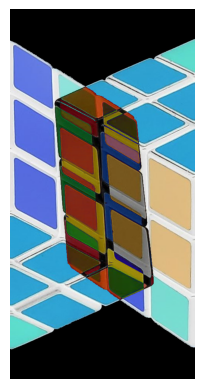

In [77]:
# Convert to uint8:
abs_diff_uint8 = abs_diff.astype(np.uint8)
# Plot differences:
plt.imshow(abs_diff_uint8)
plt.axis('off')
plt.show()

**Task:** What is the meaning of the **colored** areas in the difference image? Why are some parts of the image black?

Write your answer here:

- Some parts are black because we substract white from white (255 - 255) which results in pitch black pixel
- Colored parts are simply the inverse of the existing colours abs(C - 255)
- The shaded area in the middle is the common area, which contains colours on both pictures, so by substracting for example abs(144 - 100) we get a pretty low value, which is darker


# Point Transformation 
Points will be the second most important data type after images in this course. 
In the following we have given an L-shaped point cloud [2xn] (*n=200*), on which we want to apply some transformations. Visualizing points can be done in a very similar way as in matlab (with the function *plt.plot(x,y,...)* )

**Tasks:**
1. Visualize the point cloud. (1 Point)
1. Write a function angle2rotMat(...) that returns the rotation matrix [2x2] for a given rotation angle (in degree). (1 Point)
2. Write for the function a Header which describes what the function is doing, as well as the input and output parameter. **Hint** An example of this can be seen in the first tutorial. (1 Point)
3. Create the 2 rotation matrices *R1* and *R2*: the first with an angle of 30[degree] and the second with an angle of 60[degree]. Print both matrices. (1 Point)
4. Rotate the given point cloud by *R1* and save the result in *points_r1*. Be aware of the difference between a matrix multiplication and an elementwise multiplication. (0.5 Points)
5. Rotate *points_r1* by *R2* and save the result in *points_r2*. (0.5 Points)
6. Shift points_r2 by the *translation=(3,4)^T* and save the result in *points_t*. (1 Points)
7. Create a figure with 4 subplots. Plot *points*, *points_r1*, *points_r2* and *points_t* in the created subplots, respectively. (3 Points)

In [105]:
# generating an L-shaped point cloud.
np.random.seed(0)
points = np.hstack([np.array([[5,0.5]]).T* np.random.rand(2,100),np.array([[0.5,5]]).T*np.random.rand(2,100)])
print('Point cloud dimension:',points.shape)

Point cloud dimension: (2, 200)


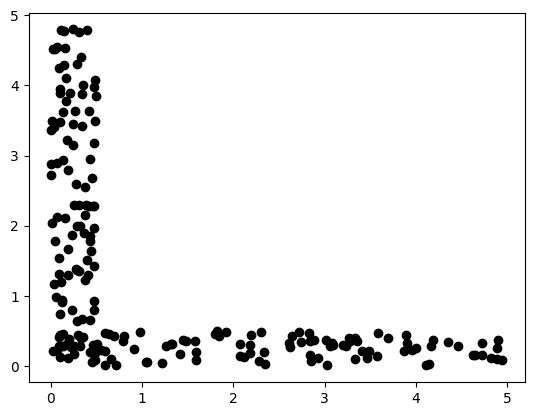

In [113]:
# Plot points here
plt.scatter(points[0], points[1], marker='o', color='k')
plt.show()

In [126]:
# write angle2rotMat(...):
def angle2rotMat(angle_deg: float) -> np.ndarray:
    '''
    Creates 2D rotation matrix given angle_deg in degrees.
    
    Parameters:
    - angle_deg (float): The angle of rotation.
    
    Returns:
    - np.ndarray: Numpy array (matrix) of rotation by given input angle (angle_deg).
    '''
    angle_rad = np.radians(angle_deg)
    
    rotMat = np.zeros((2, 2))
    
    rotMat[0, 0] = np.cos(angle_rad)
    rotMat[0, 1] = -np.sin(angle_rad)
    rotMat[1, 0] = np.sin(angle_rad)
    rotMat[1, 1] = np.cos(angle_rad)
    
    return rotMat

In [128]:
# create rotation matrices
R1 = angle2rotMat(30.0)
R2 = angle2rotMat(60.0)
print(R1)
print(R2)

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]


In [139]:
# create translation vector
translation = np.array([3, 4])
# apply Transformations 
points_r1 = np.dot(R1, points)
points_r2 = np.dot(R2, points_r1)
points_t = points_r2 + translation.reshape(2, 1)

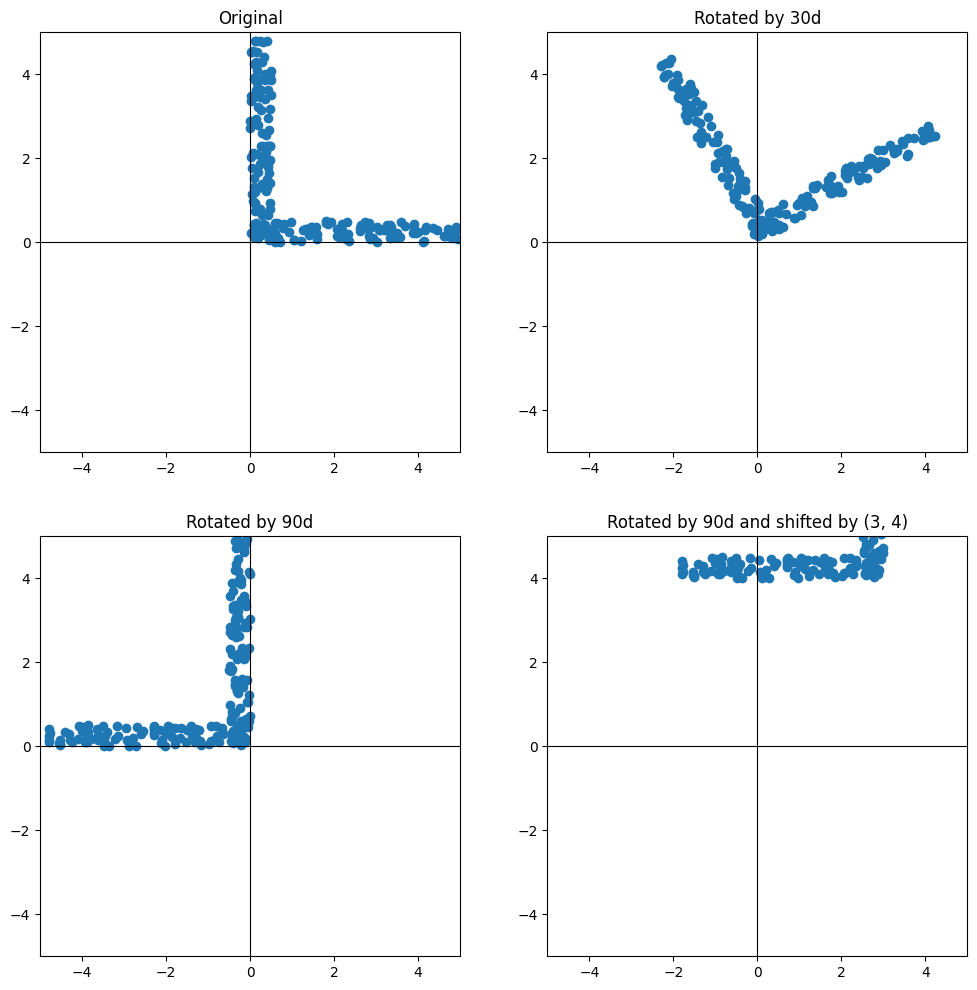

In [156]:
# create subplots and plot the results
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(12, 12))

axes[0,0].scatter(points[0], points[1])
axes[0,0].set_title('Original')
axes[0,0].set_xlim(-5, 5)
axes[0,0].set_ylim(-5, 5)
axes[0,0].set_aspect('equal')
axes[0,0].axhline(0, color='black', linewidth=0.8)
axes[0,0].axvline(0, color='black', linewidth=0.8)

axes[0,1].scatter(points_r1[0], points_r1[1])
axes[0,1].set_title('Rotated by 30d')
axes[0,1].set_xlim(-5, 5)
axes[0,1].set_ylim(-5, 5)
axes[0,1].set_aspect('equal')
axes[0,1].axhline(0, color='black', linewidth=0.8)
axes[0,1].axvline(0, color='black', linewidth=0.8)

axes[1,0].scatter(points_r2[0], points_r2[1])
axes[1,0].set_title('Rotated by 90d')
axes[1,0].set_xlim(-5, 5)
axes[1,0].set_ylim(-5, 5)
axes[1,0].set_aspect('equal')
axes[1,0].axhline(0, color='black', linewidth=0.8)
axes[1,0].axvline(0, color='black', linewidth=0.8)

axes[1,1].scatter(points_t[0], points_t[1])
axes[1,1].set_title('Rotated by 90d and shifted by (3, 4)')
axes[1,1].set_xlim(-5, 5)
axes[1,1].set_ylim(-5, 5)
axes[1,1].set_aspect('equal')
axes[1,1].axhline(0, color='black', linewidth=0.8)
axes[1,1].axvline(0, color='black', linewidth=0.8)

plt.show()

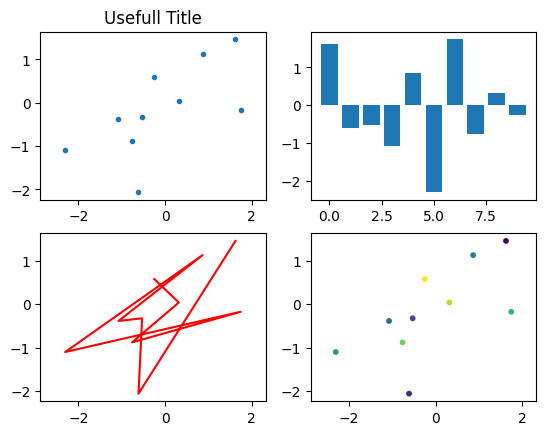

In [157]:
# Matplotlib example: Subplots

# create Some data
np.random.seed(1)
some_data = np.random.randn(2,10)

# Define Subplots
fig_ex1, axes_ex1 = plt.subplots(nrows=2,ncols=2)

# Assign 
# Draw points
axes_ex1[0,0].plot(some_data[0], some_data[1],marker='.',linestyle='')
axes_ex1[0,0].set_title('Usefull Title')
axes_ex1[0,0].axis('equal')

# Plot Bars
axes_ex1[0,1].bar(np.arange(10), some_data[0])

# Connect points by lines
axes_ex1[1,0].plot(some_data[0], some_data[1],linestyle='-',color='r')
axes_ex1[1,0].axis('equal')

# Draw points (optional: different, )
axes_ex1[1,1].scatter(some_data[0], some_data[1], s=10, c=np.arange(10), cmap='viridis')
axes_ex1[1,1].axis('equal')
plt.show()